In [1]:
!unzip /content/diabetes_012_health_indicators_BRFSS2015.csv.zip

Archive:  /content/diabetes_012_health_indicators_BRFSS2015.csv.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import shap

In [3]:
# Load the dataset
file_path = r'/content/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

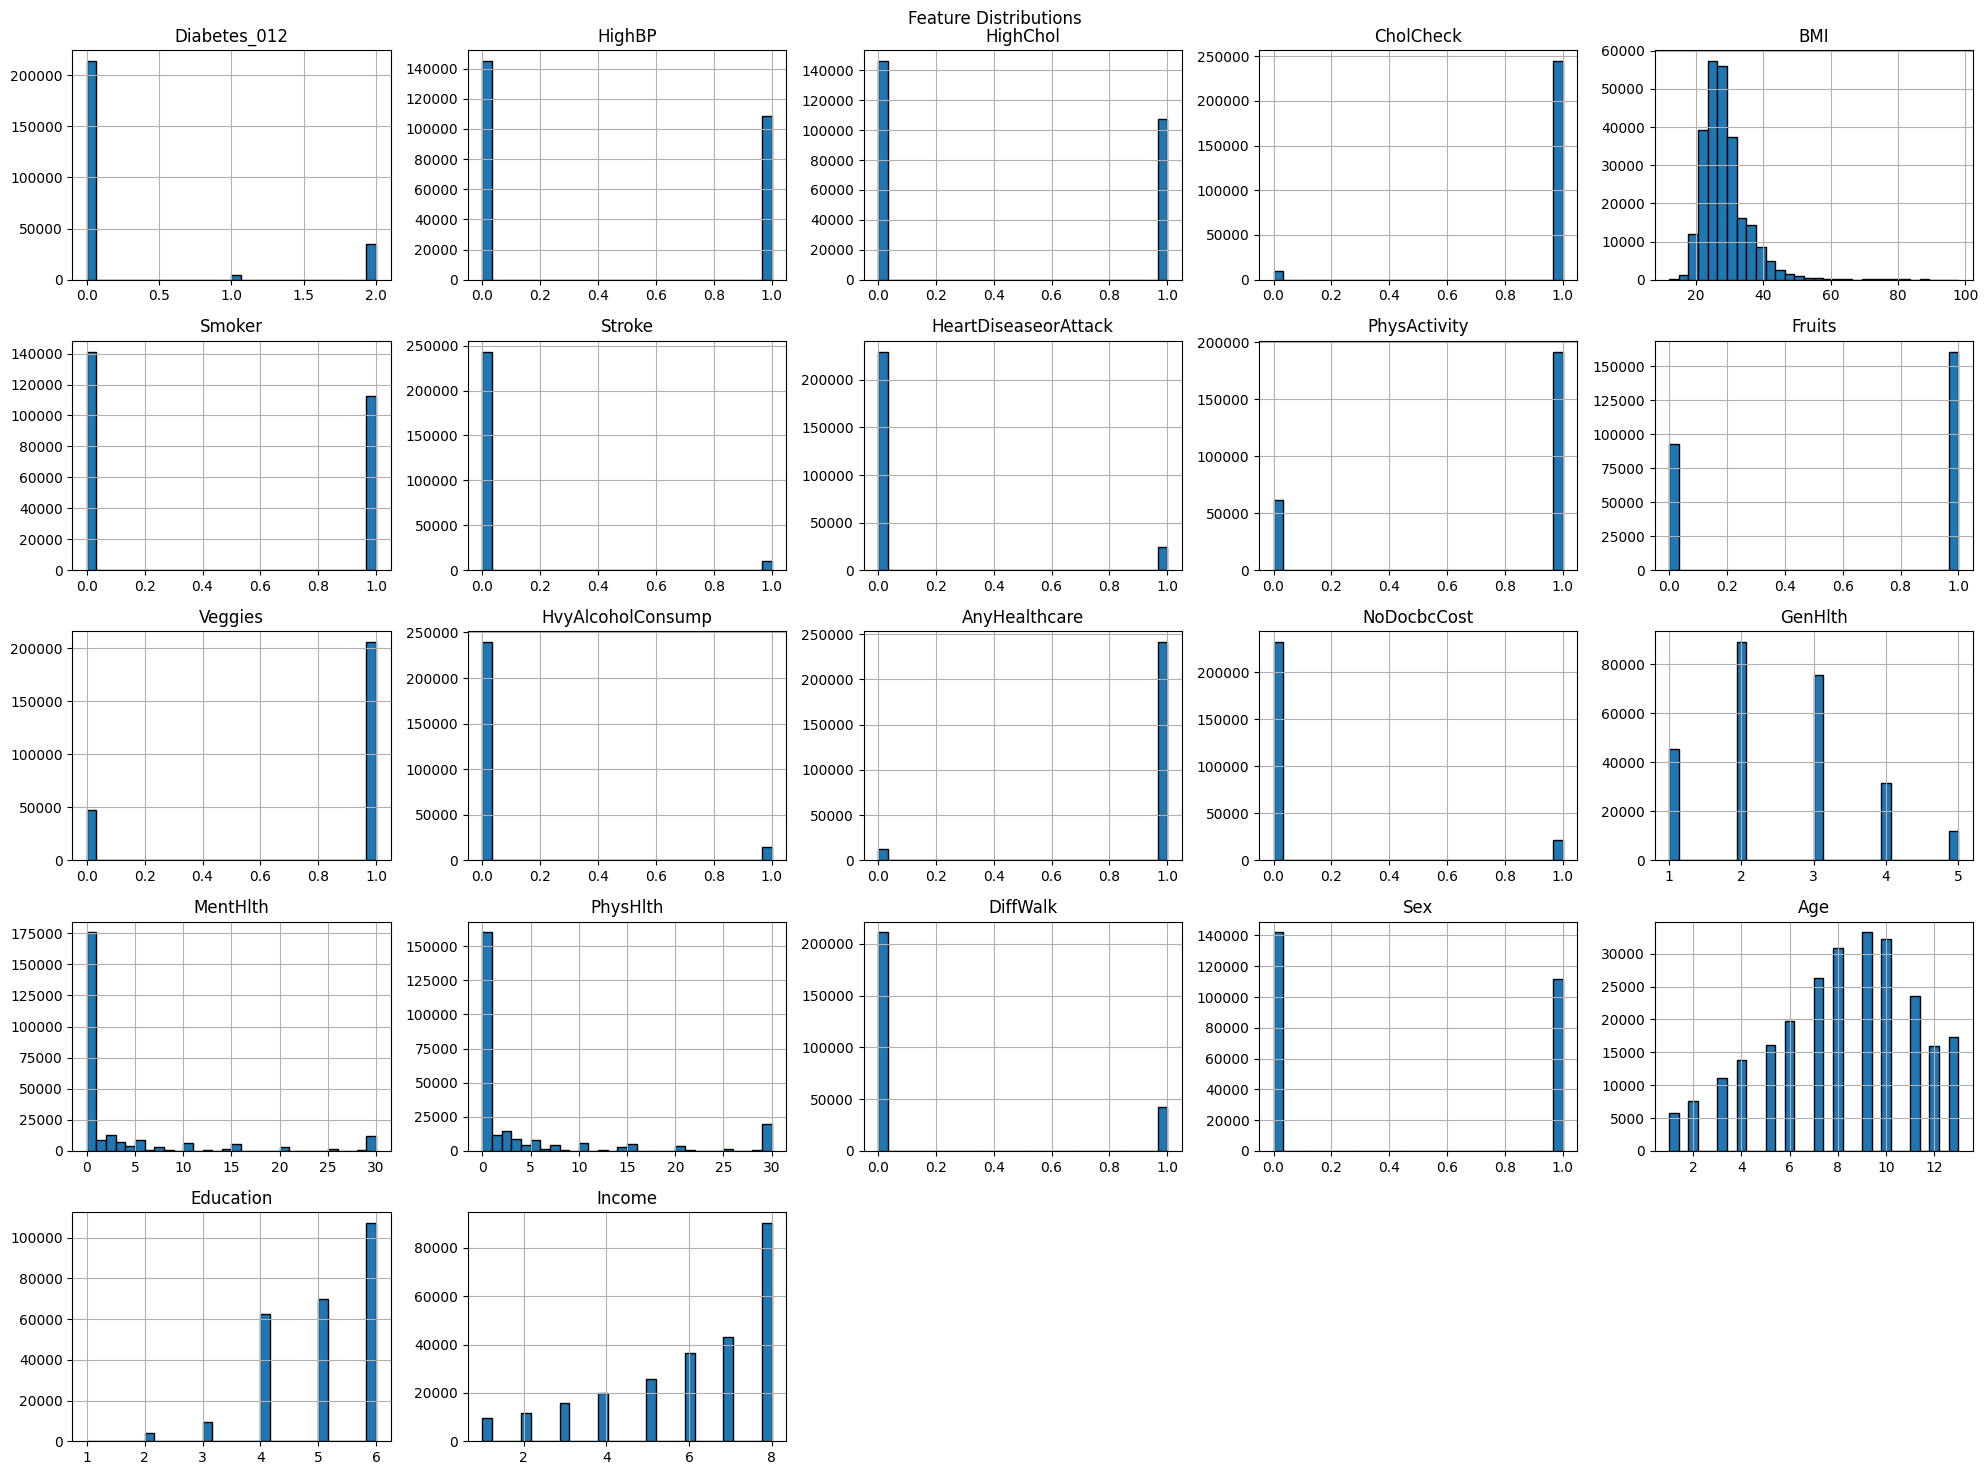

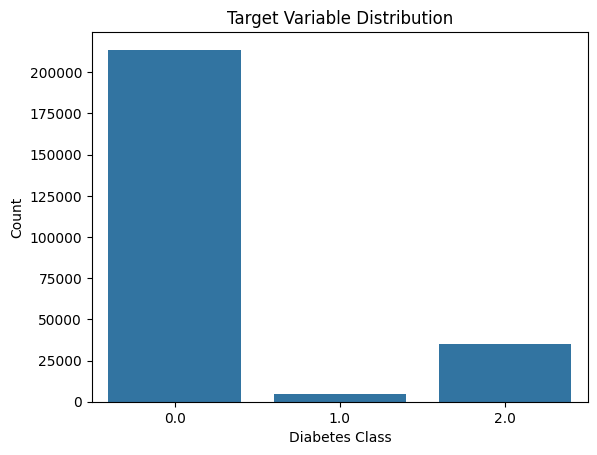

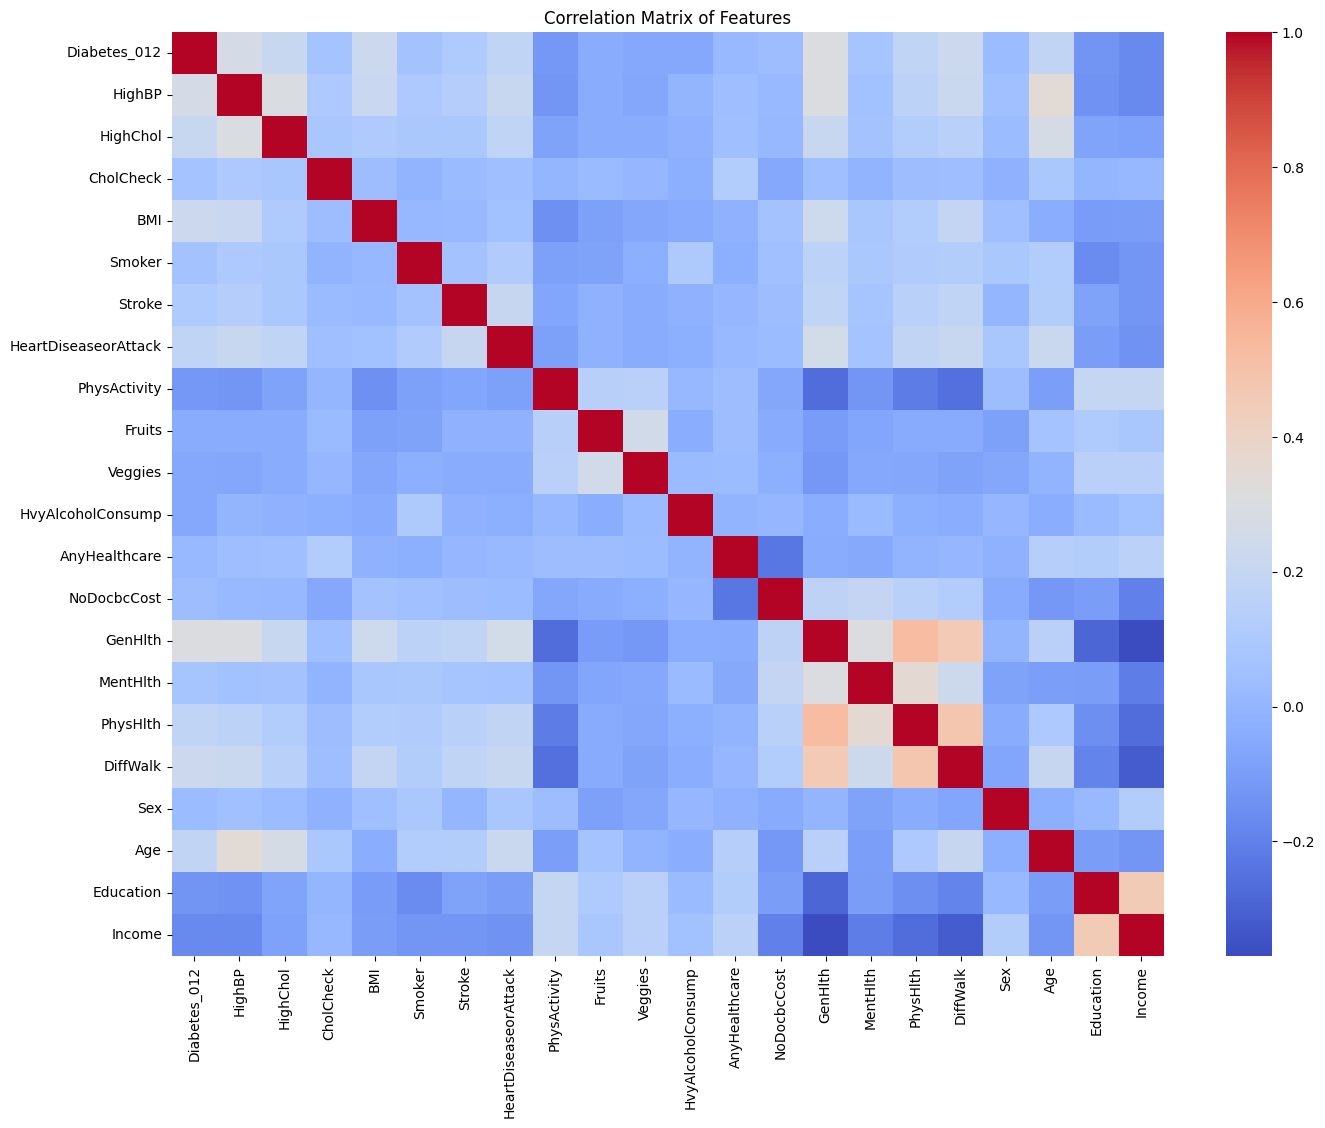

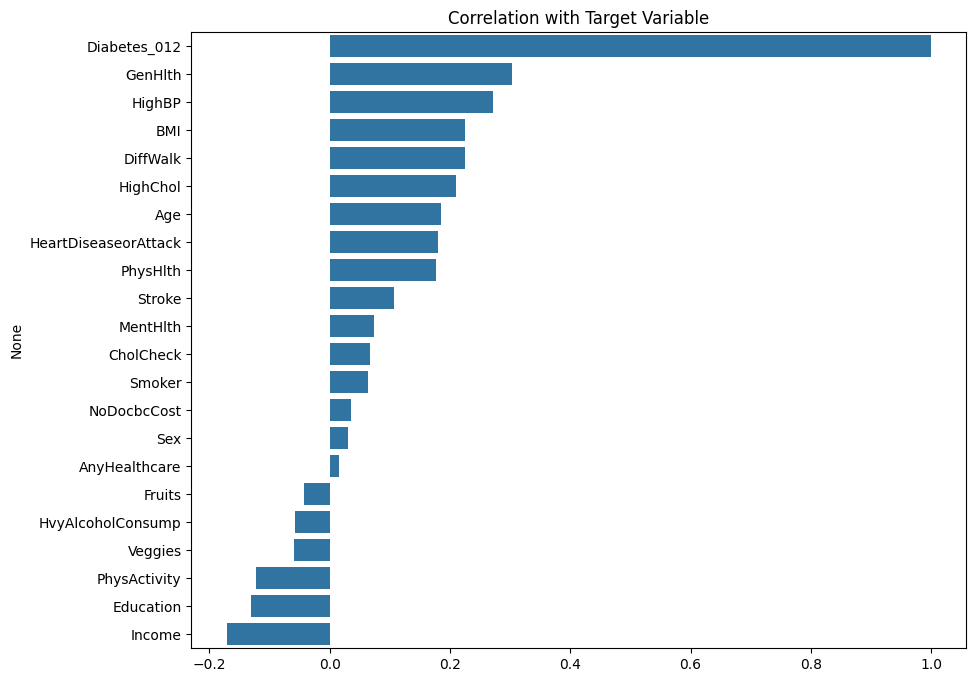

In [4]:
# --- Exploratory Data Analysis (EDA) ---

# Distribution plots for each feature
data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

# Target variable distribution
sns.countplot(x='Diabetes_012', data=data)
plt.title('Target Variable Distribution')
plt.xlabel('Diabetes Class')
plt.ylabel('Count')
plt.show()

# Correlation matrix of features
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Correlation of features with target variable
correlations = data.corr()['Diabetes_012'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlation with Target Variable')
plt.show()

# Separate features and target
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# One-hot encode the target variable
y_encoded = to_categorical(y)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp.argmax(axis=1))

In [5]:
# Build the DNN model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict the test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Generate classification report and confusion matrix
report = classification_report(y_test_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2'])
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8436 - loss: 0.4181 - val_accuracy: 0.8498 - val_loss: 0.3957
Epoch 2/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8471 - loss: 0.4006 - val_accuracy: 0.8478 - val_loss: 0.3960
Epoch 3/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8488 - loss: 0.3972 - val_accuracy: 0.8487 - val_loss: 0.3940
Epoch 4/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8483 - loss: 0.3958 - val_accuracy: 0.8493 - val_loss: 0.3957
Epoch 5/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8478 - loss: 0.3978 - val_accuracy: 0.8498 - val_loss: 0.3924
Epoch 6/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8479 - loss: 0.3970 - val_accuracy: 0.8494 - val_loss: 0.3943
Epoch 7/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8486 - loss: 0.3965 - val_accuracy: 0.8494 - val_loss: 0.3945
Epoch 8/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8513 - loss: 0.3

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Accuracy: 0.8511
Validation Accuracy: 0.8492
Testing Accuracy: 0.8492

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.98      0.92     32055
     Class 1       0.00      0.00      0.00       695
     Class 2       0.58      0.15      0.23      5302

    accuracy                           0.85     38052
   macro avg       0.48      0.38      0.38     38052
weighted avg       0.80      0.85      0.81     38052



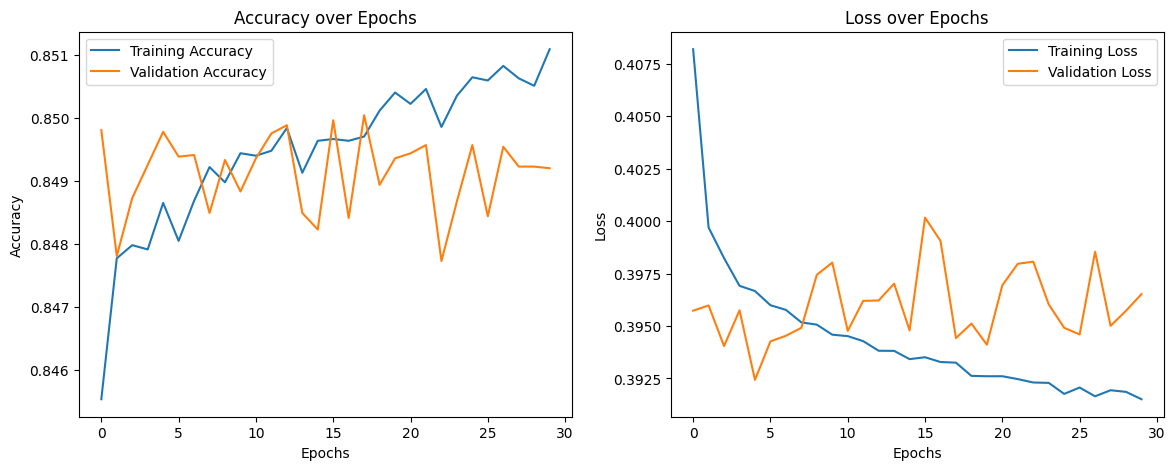

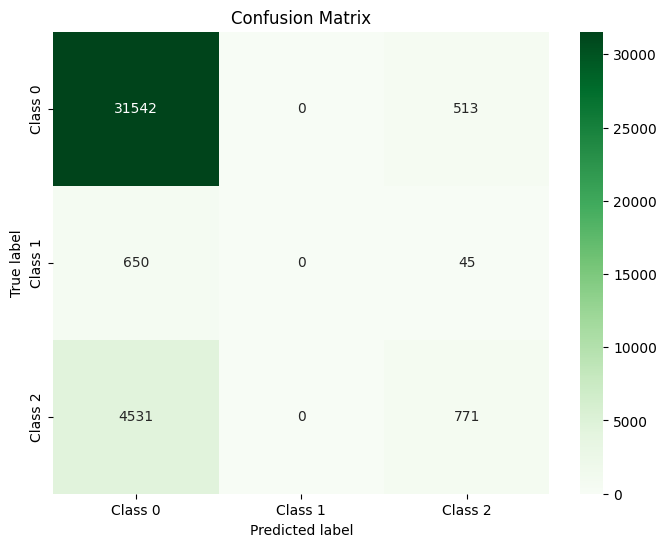

In [7]:
# Display results
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Plot training and validation accuracy and loss
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

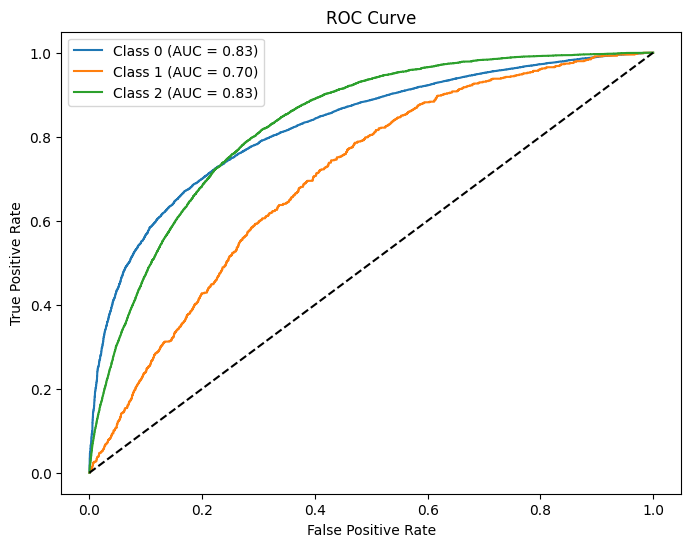

In [8]:
# ROC Curve and AUC
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], thresh[i] = roc_curve((y_test_classes==i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Explaining Class 0 with SHAP:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

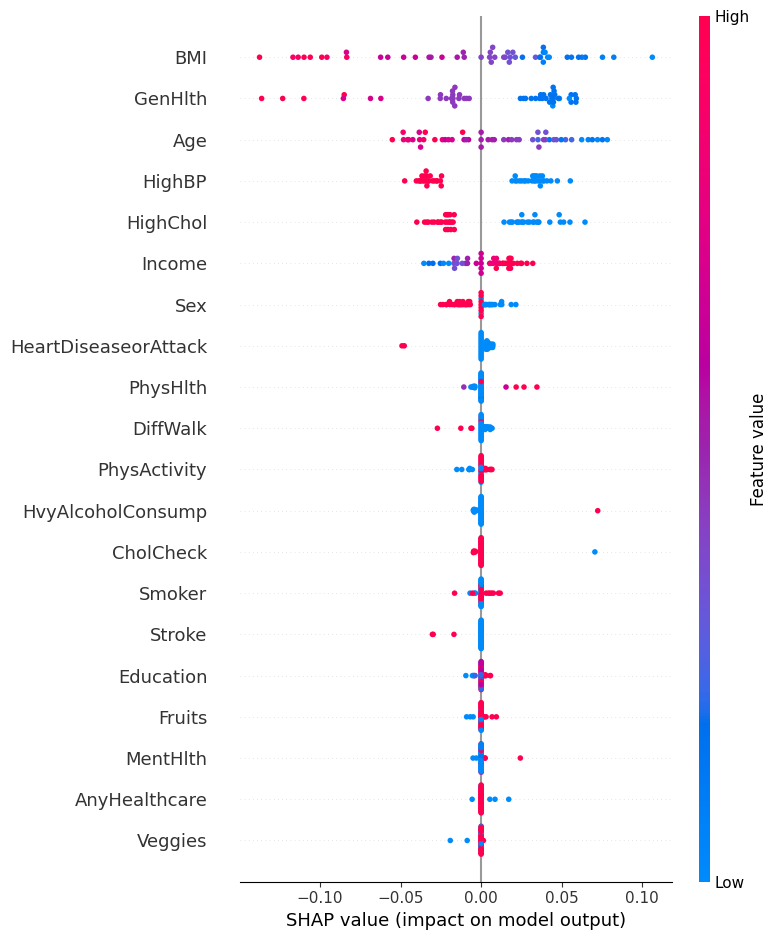


Explaining Class 1 with SHAP:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

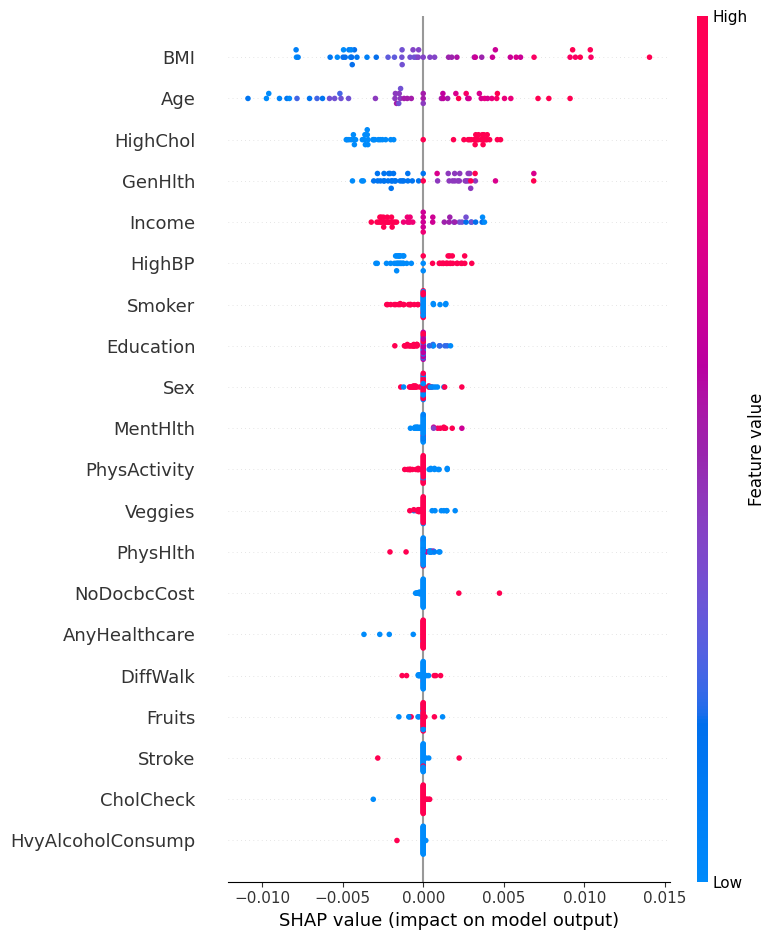


Explaining Class 2 with SHAP:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

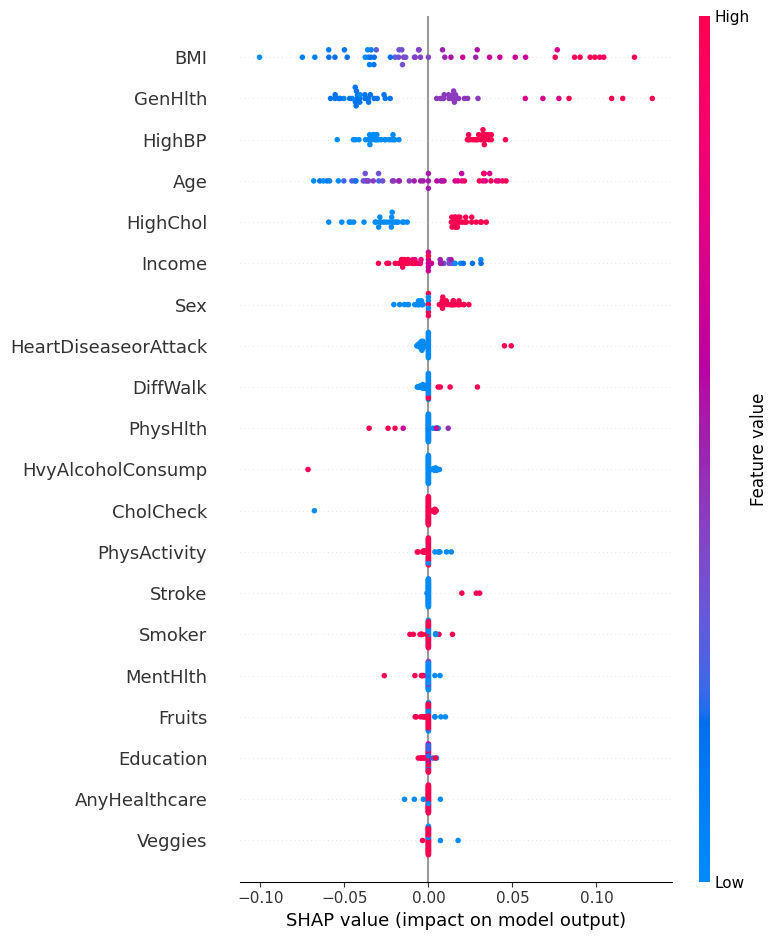

In [21]:
# --- SHAP KernelExplainer (Fixed) ---

def get_class_predictions(model, class_ind, input_data):
    return model.predict(input_data)[:, class_ind]

# Make sure data is numpy arrays
X_train = X_train if isinstance(X_train, np.ndarray) else X_train.values
X_test = X_test if isinstance(X_test, np.ndarray) else X_test.values

background = X_train[:100]
test_samples = X_test[:50]

num_classes = y_encoded.shape[1]

for class_ind in range(num_classes):
    print(f"\nExplaining Class {class_ind} with SHAP:")

    explainer = shap.KernelExplainer(lambda x: get_class_predictions(model, class_ind, x), background)

    shap_values = explainer.shap_values(test_samples)

    print(f"SHAP values shape: {np.array(shap_values).shape}")

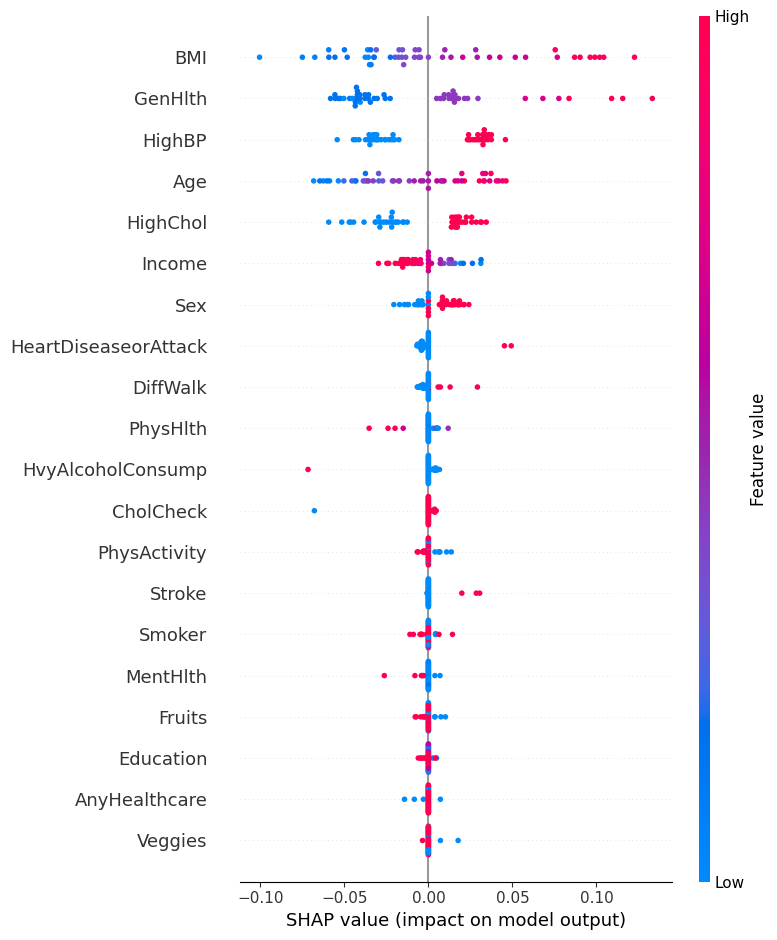

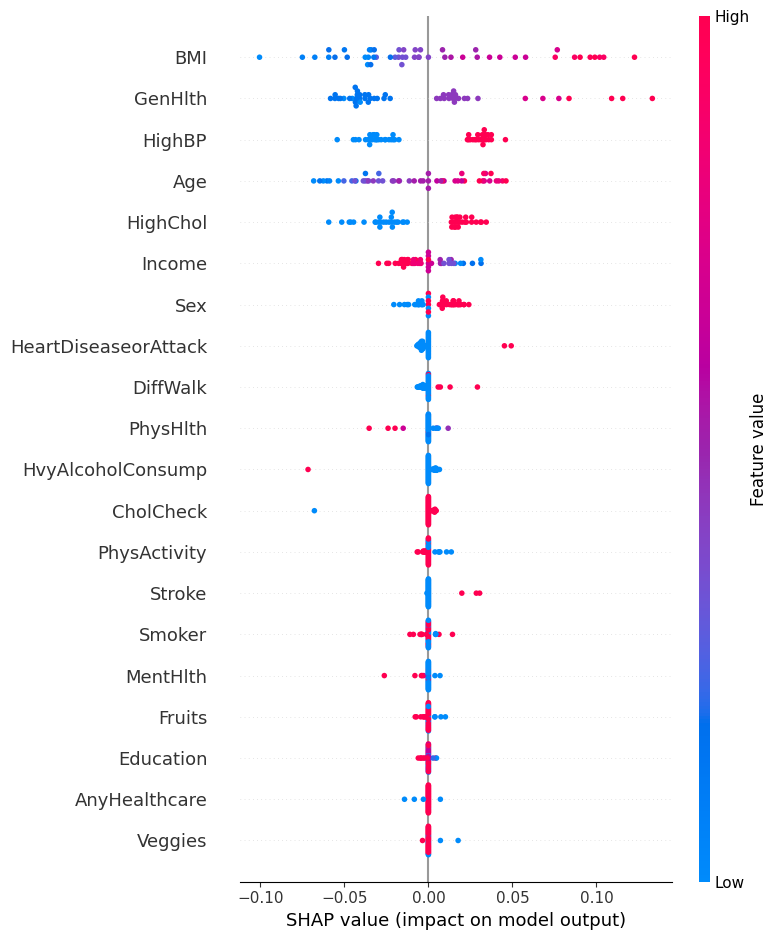

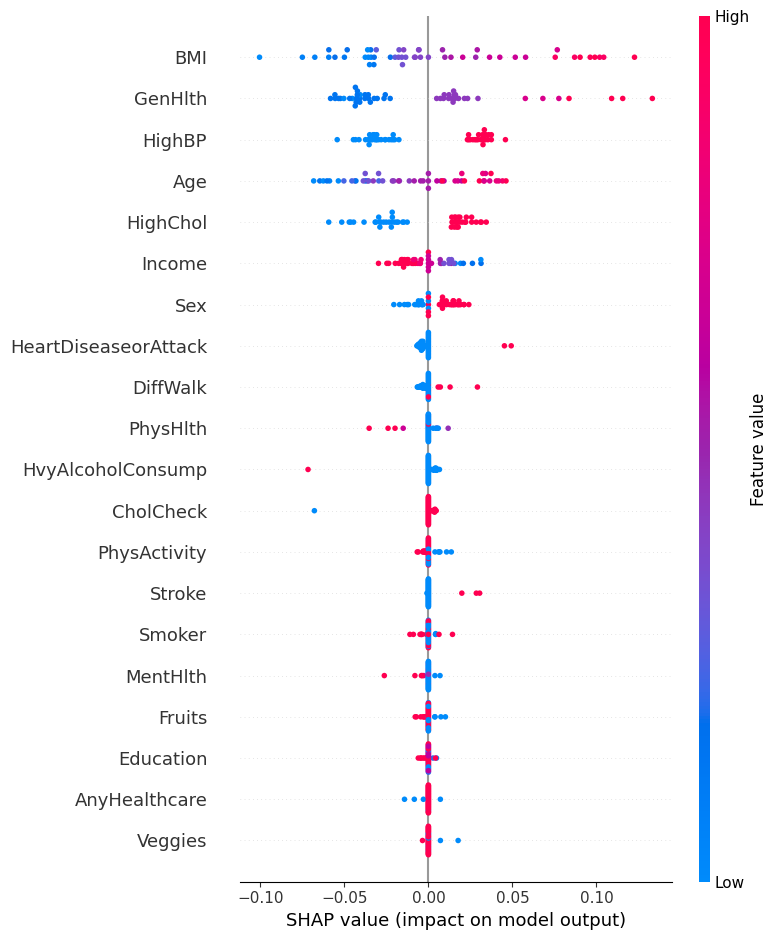

In [22]:
feature_names = X.columns
for class_ind in range(num_classes):
    shap.summary_plot(shap_values, test_samples, feature_names=feature_names)